# **TIỀN XỬ LÝ** 

## Các bước thực hiện:
 - Kiểm tra và tiền xử lý output 
 - Tách dữ liệu thành 3 tập: train, validaton, test.
 - Tiến hành tiền xử lý
 - Mô hình hoá


In [1]:
# IMPORT THƯ VIỆN
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

## Khám phá dữ liệu (đủ để có thể xác định câu hỏi)

In [2]:
pd.set_option('display.max_columns', None)  # Xem tất cả các cột

data = pd.read_csv('HOUSEs_info.csv', sep = '\t')
data.head()

,Loại hình,Phòng ngủ,Phòng tắm,Diện tích,Tình hình nội thất,Dự án,Tháp,Giá bán,Ban công,Phòng cho giúp việc,Sân vườn,Phòng giải trí,Chỗ đậu xe hơi,Hồ bơi riêng,Quầy minibar,Tầng hầm,Góc làm việc,Nhà kho,Nuôi thú cưng,Gym,Bàn ghế phòng khách,Kệ TV,Bộ bàn ăn và ghế,Đảo bếp,Đèn trang trí,Bếp ướt,Bếp khô,Tủ bếp trên,Tủ bếp dưới,Sàn gỗ,Tủ âm tường,Tủ treo đồ / tủ quần áo,Tủ kê đầu giường,Đèn trần,Đèn bàn,Giường,"Đệm, chăn, gối",Tủ giày dép,Bồn tắm,Kệ sách,Bàn làm việc,Bàn trang điểm,TV,Máy hút mùi,Cảm biến cháy,Tủ lạnh,"Bếp ga, bếp từ",Máy giặt,Máy sấy,Dàn phơi đồ thông minh,Máy lạnh,Máy nước nóng,Khóa cửa thẻ từ,Khóa cửa mật khẩu,Khóa cửa vân tay,Thiết bị âm thanh,Smart Home,Lò nướng,Lò vi sóng,Camera an ninh,Internet,Truyền hình cáp,Số tầng,Diện tích sử dụng,Loại chủ quyền,Trạng thái,Thời gian bắt đầu bán,Mã nhà đất,Giá đăng,Loại hình nhà đất,Số phòng ngủ,Số phòng tắm,Hướng cửa,Hướng ban công,Tình trạng nội thất,Ngày Đăng,Tủ bếp trên\n,Thời gian Xây dựng,Chiều dài,Chiều rộng,Diện tích sàn,Mục đích sử dụng,Giường\n,Tủ bếp dưới\n,Đảo bếp\n,Q2 Thảo Điền,Căn hộ cao cấp quận 2,Chủ đầu tư Singapore Thảo Điền,Căn hộ Thảo Điền,Căn hộ hạng sang,Căn hộ view sông,Đầy đủ vệ sinh,Kệ bếp,Hoàn thiện cơ bản,Rèm,Nhà trống,Đèn,Điện,sàn,tường,tủ âm,Mặt tiền chợ,Hẻm Xe Hơi,Căn Hộ Era Town,Era Town quận 7,căn hộ,căn hộ quận 7,căn hộ cần bán,Hồ bơi tràn,Khu tiệc nướng BBQ,Vườn tiểu cảnh,khuôn viên đi dạo,Khu vui chơi trẻ em,Giếng trời,Gác Lửng,Quạt trần hàng Ngoại,Hồ cá,3 máy lạnh,1 phòng thờ,1 sân phơi
0,Căn hộ,3.0,2.0,83.15 m²,Đầy đủ nội thất,Sunrise Riverside,G1,4.19 tỷ,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Căn hộ,1.0,1.0,53.2 m²,Nội thất cơ bản,Q7 Saigon Riverside,MERCURY,1.87 tỷ,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,24.0,53.2 m²,HĐ mua bán,Chưa bàn giao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Căn hộ,3.0,2.0,105.8 m²,Nội thất cơ bản,Vinhomes Central Park,NaN,6.5 tỷ,Yes,No,No,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,11/10/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Căn hộ,2.0,2.0,106.1 m²,Nội thất cơ bản,Sunrise City,NaN,4.25 tỷ,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,106.1 m²,Sổ hồng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Căn hộ,2.0,1.0,60 m²,Đầy đủ nội thất,Vinhomes Grand Park,S2.05,2.65 tỷ,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,11.0,60 m²,HĐ mua bán,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
data.shape

(7154, 120)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin của một ngôi nhà, và có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

In [4]:
data.index.duplicated().sum()

0

## Đưa ra câu hỏi cần trả lời
*Output - Giá bán -* được tính từ *input - các thông tin của hành khách -* theo công thức nào?
 Trong đồ án này, ý nghĩa thực tế của việc đi tìm câu trả lời cho câu hỏi trên giúp người dùng có được 1 sự tham khảo với 1 độ chính xác cụ thể về giá nhà dựa trên các thông tin. Qua đó, người dùng có thể dựa trên dự đoán để tự đưa ra quyết định về việc mua (bán) nhà với một mức giá hợp lý.  


## Khám phá dữ liệu 
### 1. OUTPUT TRƯỚC KHI TIỀN XỬ LÝ

In [5]:
# Cột output hiện có kiểu dữ liệu gì?
data['Giá bán'].dtype

dtype('O')

In [6]:
# Cột output có giá trị thiếu không?
data['Giá bán'].isna().sum()

396

#### TIỀN XỬ LÝ OUTPUT

In [7]:
# Xoá ouput có giá trị thiếu
data = data[data['Giá bán'].notna()]
data['Giá bán'].isna().sum()
data = data.reset_index(drop = True) 

In [8]:
# Chuẩn hoá về dạng số

# Vị trí các số hảng tỷ
mil_index = [] 
# Vị trí các số hảng triệu
bil_index = []

for i in range(0, data.shape[0]):
    value = data['Giá bán'][i] 
    if 'tỷ' in value:
        data.at[i, 'Giá bán'] = value.rstrip('tỷ')
        bil_index.append(i)
    elif 'tr' in value:
        data.at[i, 'Giá bán'] = value.rstrip(' tr')
        mil_index.append(i)

In [9]:
# Chuyển đơn vị triệu thành tỷ (đồng)
data['Giá bán'] = data['Giá bán'].astype(float)
for i in bil_index:
    data.at[i, 'Giá bán'] = data['Giá bán'][i] * 1000
data['Giá bán'] = data['Giá bán'].astype(int)

### 2. SAU KHI TIỀN XỬ LÝ OUTPUT

In [10]:
# Cột output hiện có kiểu dữ liệu gì?
data['Giá bán'].dtype

dtype('int32')

In [11]:
# Cột output có giá trị thiếu không?
data['Giá bán'].isna().sum()

0

## Tiền xử lý (tách các tập)
  - Ta tách các tập từ dữ liệu thu thập được thành 3 tập: train, validation và test theo tỉ lệ: 70%:15%:15%

In [12]:
# Tách X và y
y_sr = data['Giá bán'] # sr là viết tắt của series
X_df = data.drop("Giá bán", axis=1)

In [13]:
# Tách theo tỉ lệ: 7:1.5:1.5
# Tách dữ liệu thu thập thành 2 tập: tập huấn luyện và tập other (validation và test) theo tỉ lệ 70%:30%
train_X_df, other_X_df, train_y_sr, other_y_sr = train_test_split(X_df, y_sr, test_size=0.3, random_state=0)

# Tách tập other (validation và test) thành 2 tập: tập validation và tập test theo tỉ lệ 50%:50% (tức: bằng 15%:15% so với dữ liệu ban đầu)
val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(other_X_df, other_y_sr, test_size=0.5, random_state=0)

train_X_df.shape, val_X_df.shape, test_X_df.shape, train_y_sr.shape, val_y_sr.shape, test_y_sr.shape
train_y_sr

4819    3680
1216    1270
6556    1850
1393    2980
5615    4700
        ... 
4931    2880
3264    3600
1653    5450
2607    5600
2732    1850
Name: Giá bán, Length: 4730, dtype: int32

## Khám phá dữ liệu (tập huấn luyện)

In [14]:
train_X_df.dtypes

Loại hình                object
Phòng ngủ               float64
Phòng tắm               float64
Diện tích                object
Tình hình nội thất       object
                         ...   
Quạt trần hàng Ngoại     object
Hồ cá                    object
3 máy lạnh               object
1 phòng thờ              object
1 sân phơi               object
Length: 119, dtype: object

In [15]:
train_X_df.dtypes[train_X_df.dtypes != object]

Phòng ngủ    float64
Phòng tắm    float64
Số tầng      float64
dtype: object

In [16]:
dropped_cols = []
num_cols = ['Phòng ngủ', 'Phòng tắm', 'Số tầng']

In [17]:
# Các cột dạng số
df = train_X_df[num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,Phòng ngủ,Phòng tắm,Số tầng
missing_ratio,2.0,2.4,47.6
min,0.0,1.0,1.0
lower_quartile,2.0,1.0,3.0
median,2.0,2.0,9.0
upper_quartile,2.0,2.0,17.0
max,31.0,32.0,44.0


In [18]:
# Các cột không phải dạng số

cat_cols = list(set(train_X_df.columns) - set(num_cols))
df = train_X_df[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])


,Dàn phơi đồ thông minh,Chỗ đậu xe hơi,Điện,Chiều rộng,Bếp khô,Tủ treo đồ / tủ quần áo,Truyền hình cáp,Vườn tiểu cảnh,Máy sấy,Kệ sách,Camera an ninh,khuôn viên đi dạo,Khu tiệc nướng BBQ,3 máy lạnh,1 phòng thờ,1 sân phơi,Tầng hầm,Đầy đủ vệ sinh,Đèn,Tủ âm tường,Máy lạnh,Phòng cho giúp việc,Căn hộ hạng sang,Tủ bếp trên\n,Máy giặt,Gym,căn hộ,Tủ bếp dưới,Khóa cửa mật khẩu,Loại hình,Đèn trang trí,Thiết bị âm thanh,tường,Căn Hộ Era Town,Tủ lạnh,Nhà trống,Ban công,tủ âm,Lò nướng,Hướng ban công,Bàn làm việc,Khóa cửa thẻ từ,Tủ kê đầu giường,Hoàn thiện cơ bản,Khu vui chơi trẻ em,Đèn bàn,Thời gian bắt đầu bán,Thời gian Xây dựng,Hồ bơi tràn,Phòng giải trí,Tình hình nội thất,Mục đích sử dụng,Dự án,Khóa cửa vân tay,Bàn trang điểm,Căn hộ cao cấp quận 2,Nhà kho,Hướng cửa,Diện tích,Máy hút mùi,Bộ bàn ăn và ghế,Loại hình nhà đất,Ngày Đăng,căn hộ quận 7,Diện tích sử dụng,Sàn gỗ,Tủ bếp dưới\n,Cảm biến cháy,Bếp ướt,Góc làm việc,Sân vườn,Đảo bếp,Mặt tiền chợ,Hẻm Xe Hơi,Bàn ghế phòng khách,Q2 Thảo Điền,Giường,Trạng thái,căn hộ cần bán,Gác Lửng,"Bếp ga, bếp từ",Hồ bơi riêng,Lò vi sóng,Chiều dài,Chủ đầu tư Singapore Thảo Điền,Giá đăng,Bồn tắm,Quầy minibar,Nuôi thú cưng,Mã nhà đất,Era Town quận 7,Máy nước nóng,Số phòng tắm,Tủ giày dép,TV,Kệ TV,sàn,"Đệm, chăn, gối",Giếng trời,Hồ cá,Đảo bếp\n,Tháp,Tình trạng nội thất,Tủ bếp trên,Internet,Căn hộ view sông,Diện tích sàn,Rèm,Smart Home,Đèn trần,Kệ bếp,Loại chủ quyền,Giường\n,Số phòng ngủ,Quạt trần hàng Ngoại,Căn hộ Thảo Điền
missing_ratio,0,0,100,98.8,2,2,0,100,0,2,0,100,100,100,100,100,0,100,100,2,0,0,100,99.7,0,0,100,2.3,0,0,2,0,100,100,0,100,0,100,0,100,2,0,2,100,100,2,85.5,95.4,100,0,4.7,94.3,18.2,0,2,100,0,100,0.7,0,2,100,100,100,18.3,2,99.7,0,2,0,0,2.3,100,100,2,100,2.4,78.7,100,100,0,0,0,98.8,100,100,2,0,0,100,100,0,100,2,0,2,100,2,100,100,99.6,53.3,100,2.2,0,100,99.3,100,0,2,100,28.5,99.5,100,100,100
num_values,2,2,0,17,2,2,2,0,2,2,2,0,0,0,0,0,2,1,0,2,2,2,1,1,2,2,1,2,2,14,2,2,0,1,2,1,2,0,2,0,2,2,2,1,0,2,396,31,0,2,3,23,351,2,2,1,2,0,1140,2,2,0,0,1,1019,2,1,2,2,2,2,2,1,1,2,1,2,1,1,0,2,2,2,23,1,0,2,2,2,0,1,2,0,2,2,2,0,2,0,0,1,227,0,2,2,1,32,1,2,2,1,4,2,0,0,1
value_ratios,"{'No': 99.5, 'Yes': 0.5}","{'No': 88.9, 'Yes': 11.1}",{},"{'4 m': 26.8, '5 m': 14.3, '8 m': 12.5, '10 m'...","{'No': 98.6, 'Yes': 1.4}","{'No': 91.1, 'Yes': 8.9}","{'No': 93.1, 'Yes': 6.9}",{},"{'No': 99.7, 'Yes': 0.3}","{'No': 98.3, 'Yes': 1.7}","{'No': 99.0, 'Yes': 1.0}",{},{},{},{},{},"{'No': 96.6, 'Yes': 3.4}",{'Yes': 100.0},{},"{'No': 98.9, 'Yes': 1.1}","{'No': 97.9, 'Yes': 2.1}","{'No': 99.3, 'Yes': 0.7}",{'Yes': 100.0},{'No': 100.0},"{'No': 98.7, 'Yes': 1.3}","{'No': 90.2, 'Yes': 9.8}",{'Yes': 100.0},"{'No': 98.0, 'Yes': 2.0}","{'No': 99.3, 'Yes': 0.7}","{'Căn hộ': 80.6, 'Nhà phố': 12.3, 'Office-tel'...","{'No': 98.6, 'Yes': 1.4}","{'No': 99.8, 'Yes': 0.2}",{},{'Yes': 100.0},"{'No': 98.3, 'Yes': 1.7}",{'Yes': 100.0},"{'No': 87.7, 'Yes': 12.3}",{},"{'No': 99.6, 'Yes': 0.4}",{},"{'No': 95.2, 'Yes': 4.8}","{'No': 99.1, 'Yes': 0.9}","{'No': 99.3, 'Yes': 0.7}",{'Yes': 100.0},{},"{'No': 99.5, 'Yes': 0.5}","{'28/09/2020': 1.9, '16/12/2020': 1.5, '07/12/...","{'01/01/2016': 19.6, '01/01/2015': 16.4, '01/0...",{},"{'No': 97.0, 'Yes': 3.0}","{'Nội thất cơ bản': 39.2, 'Đầy đủ nội thất': 3...","{'để ở hoặc cho thuê': 30.1, 'Ở': 23.0, 'Để ở'...","{'Vinhomes Grand Park': 16.1, 'Vinhomes Centra...","{'No': 99.4, 'Yes': 0.6}","{'No': 95.9, 'Yes': 4.1}",{'Yes': 100.0},"{'No': 98.9, 'Yes': 1.1}",{},"{'59 m²': 3.1, '69 m²': 2.3, '70 m²': 1.9, '75...","{'No': 99.1, 'Yes': 0.9}","{'No': 92.3, 'Yes': 7.7}",{},{},{'Yes': 100.0},"{'54 m²': 3.1, '63 m²': 3.0, '65 m²': 2.0, '75...","{'No': 99.2, 'Yes': 0.8}",{'No': 100.0},"{'No': 99.3, 'Yes': 0.7}","{'No': 99.4, 'Yes': 0.6}","{'No': 93.7, 'Yes': 6.3}","{'No': 97.6, 'Yes': 2.4}","{'No': 99.8, 'Yes': 0.2}",{'Yes': 100.0},{'Yes': 100.0},"{'No': 91.9, 'Yes': 8.1}",{'Yes': 100.0},"{'No': 92.3, 'Yes': 7.7}",{'Chưa bàn giao': 100.0},{'Yes': 100.0},{},"{'No': 98.8, 'Yes': 1.2}","{'No': 91.4, 'Yes': 8.6}","{'No'

In [19]:
# liệt kê các tập có độ missing values >= 50%

for i in range(0, df.shape[1]):
    if df.agg(missing_ratio)[i] >= 50:
#         print(df.columns.values[i], df.agg(missing_ratio)[i])
        dropped_cols.append(df.columns.values[i])
len(dropped_cols)

56

## Tiền xử lý (tập huấn luyện)

    Ta tiến hành tiền xử lý như sau:
       * Xoá đi những cột có độ missing values > 50%
       * Chuyển các cột dạng số nhưng lại ở dạng chuỗi về lại dạng số ('Diệc tích', 'Diện tích sử dụng')
       * Xoá cột dự án

In [20]:
# Hàm chuyển các cột dạng số nhưng lại ở dạng chuỗi về lại dạng số
def ConVert2Num(df, array):
    '''
    Input : df, Categorical Column Name Array
    Output: Numeric Columns
    '''
    
    for j in array:
        for i in range(0, df.shape[0]):
            index = df.index[i]
            temp = df[j][index] 

            if pd.isna(temp) == False:
                if 'm²' in temp:
                    df.at[index, j] = temp.replace(',', '').rstrip(' m²')
                    
        df[j] = df[j].astype(float)
    
    return df

# Hàm chuyển cột số tầng từ float sang int
# def Convert2Int(df, array):
#     '''
#     Input : df, Float Column Name Array
#     Output: Int Columns
#     '''
    
#     for i in array:
#         for j in range(0, df.shape[0]):
#             index = df.index[j] 

#             if pd.isna(df[i][index]) == False:
#                     df.at[index, i] = int(df[i][index])
# #     df[i] = df[i].astype(int)

#     print(df['Số tầng'].dtype)
#     return df

In [21]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_Loai_hinh=1):
        self.num_top_Loai_hinh = num_top_Loai_hinh

    def fit(self, X_df, y=None):
        Loai_hinh_col = X_df['Loại hình']
        self.Loai_hinh_counts_ = Loai_hinh_col.value_counts()
        Loai_hinh = list(self.Loai_hinh_counts_.index)
        self.top_Loai_hinh_ = Loai_hinh[:max(1, min(self.num_top_Loai_hinh, len(Loai_hinh)))]

        return self
    def transform(self, X_df, y=None):
        # YOUR CODE HERE
        df = X_df.copy()
        Loai_hinh_col = df["Loại hình"] 
        Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
        df["Thuộc loại hình"] = Loai_hinh_col
        
        dropped_cols.extend(('Loại hình', 'Dự án'))
        df.drop(dropped_cols, axis=1, inplace=True)
        
        to_float_arr = ['Diện tích', 'Diện tích sử dụng']
        ConVert2Num(df, to_float_arr)
        
#         to_int_arr = ['Số tầng']
#         Convert2Int(df, to_int_arr)
        return df

In [22]:
# TEST FIT METHOD
col_adderdropper = ColAdderDropper(num_top_Loai_hinh=4)
col_adderdropper.fit(train_X_df)
print(col_adderdropper.Loai_hinh_counts_)
print()
print(col_adderdropper.top_Loai_hinh_)
print()


Căn hộ                 3811
Nhà phố                 583
Office-tel              173
Đất nền                  39
Shophouse                38
Biệt thự                 27
Penthouse                23
Văn phòng                20
Căn hộ dịch vụ            6
Loại khác                 4
Lofthouse                 3
Đất công nghiệp           1
Mặt bằng kinh doanh       1
Nhà xưởng kho bãi         1
Name: Loại hình, dtype: int64

['Căn hộ', 'Nhà phố', 'Office-tel', 'Đất nền']



In [23]:
after_train_transform_df = col_adderdropper.transform(train_X_df)
print(after_train_transform_df.shape)
after_train_transform_df.head()

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'


(4730, 62)


,Phòng ngủ,Phòng tắm,Diện tích,Tình hình nội thất,Ban công,Phòng cho giúp việc,Sân vườn,Phòng giải trí,Chỗ đậu xe hơi,Hồ bơi riêng,Quầy minibar,Tầng hầm,Góc làm việc,Nhà kho,Nuôi thú cưng,Gym,Bàn ghế phòng khách,Kệ TV,Bộ bàn ăn và ghế,Đảo bếp,Đèn trang trí,Bếp ướt,Bếp khô,Tủ bếp trên,Tủ bếp dưới,Sàn gỗ,Tủ âm tường,Tủ treo đồ / tủ quần áo,Tủ kê đầu giường,Đèn trần,Đèn bàn,Giường,"Đệm, chăn, gối",Tủ giày dép,Bồn tắm,Kệ sách,Bàn làm việc,Bàn trang điểm,TV,Máy hút mùi,Cảm biến cháy,Tủ lạnh,"Bếp ga, bếp từ",Máy giặt,Máy sấy,Dàn phơi đồ thông minh,Máy lạnh,Máy nước nóng,Khóa cửa thẻ từ,Khóa cửa mật khẩu,Khóa cửa vân tay,Thiết bị âm thanh,Smart Home,Lò nướng,Lò vi sóng,Camera an ninh,Internet,Truyền hình cáp,Số tầng,Diện tích sử dụng,Loại chủ quyền,Thuộc loại hình
4819,2.0,2.0,69.2,Đầy đủ nội thất,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,9.0,63.4,HĐ mua bán,Căn hộ
1216,1.0,1.0,30.4,Nội thất cơ bản,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,22.0,27.7,HĐ mua bán,Office-tel
6556,3.0,2.0,77.0,Đầy đủ nội thất,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,4.0,77.0,NaN,Căn hộ
1393,2.0,2.0,58.3,Không có nội thất,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,9.0,53.3,HĐ mua bán,Căn hộ
5615,2.0,2.0,72.0,Đầy đủ nội thất,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,10.0,72.0,NaN,Căn hộ


- Đến đây, các cột dạng số (numerical) gồm: "Phòng ngủ", "Phòng tắm", "Số tầng", "Diện tích", "Diện tích sử dụng". Các cột không phải dạng số (categorical) và không có thứ tự gồm: 57 cột bên dưới. Các bước tiền xử lý tiếp theo như sau:

    - Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị mean của cột (gợi ý: dùng SimpleImputer trong Sklearn). Với tất cả các cột dạng số trong tập huấn luyện, ta đều cần tính mean, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
    - Với các cột không phải dạng số và không có thứ tự:
        - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột (gợi ý: dùng SimpleImputer trong Sklearn). Với tất cả các cột không có dạng số và không có thứ tự, ta đều cần tính mode, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
        - Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot (gợi ý: dùng OneHotEncoder trong Sklearn, để ý tham số handle_unknown vì khi dự đoán với các véc-tơ input mới ...).

- Cuối cùng, khi tất cả các cột đã được điền giá trị thiếu và đã có dạng số, ta sẽ tiến hành chuẩn hóa bằng cách trừ đi mean và chia cho độ lệch chuẩn của cột để giúp cho các thuật toán cực tiểu hóa như Gradient Descent, LBFGS, ... hội tụ nhanh hơn (gợi ý: dùng StandardScaler trong Sklearn).
- Nhiệm vụ: tạo ra một pipeline, đặt tên là preprocess_pipeline, bao gồm: bước thêm cột 'Diện tích', 'Diện tích sử dụng' và bỏ các cột (đã cài ở class ColAdderDropper, để num_top_Loai_hinh=4), và tất cả các bước ở đây. Sau khi tạo ra được pipeline này rồi, bạn sẽ gọi phương thức fit_transform với đầu vào là train_X_df để tính các giá trị từ tập huấn luyện và đồng thời tiền xử lý train_X_df; kết quả trả về sẽ là train_X_df sau khi đã tiền xử lý, là một mảng Numpy, bạn đặt tên là preprocessed_train_X. 

In [24]:
# CÁC CỘT DẠNG SỐ
num_cols.extend(('Diện tích', 'Diện tích sử dụng'))
num_cols

['Phòng ngủ', 'Phòng tắm', 'Số tầng', 'Diện tích', 'Diện tích sử dụng']

In [25]:
# CỘT KHÔNG PHẢI DẠNG SỐ
cate_cols = []
for i in after_train_transform_df.columns:
    if i not in num_cols:
        cate_cols.append(i)
#         print(i)
        
# Số lượng cột
len(cate_cols)

57

In [26]:
imp_mean = SimpleImputer(strategy='mean')
imp_mode = SimpleImputer(strategy='most_frequent')
encoding = OneHotEncoder()
categorical_transformer = make_pipeline(imp_mode, encoding)

colTransform = ColumnTransformer(transformers=[('numerical', imp_mean, num_cols),
                                               ('categorical', categorical_transformer, cate_cols)])

colNormalize = StandardScaler()
preprocess_pipeline = make_pipeline(col_adderdropper, colTransform, colNormalize)

preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'


In [27]:
preprocess_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_Loai_hinh=4)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Phòng ngủ', 'Phòng tắm',
                                                   'Số tầng', 'Diện tích',
                                                   'Diện tích sử dụng']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Tình hì...
                                                   'Sân vườn', 'Phòng giải trí',
                                                   'Chỗ đậu xe hơi',
                                                   'Hồ bơi riêng',
                                                   'Quầy minibar', 'Tầng hầm',
                                                   'Góc làm việc', 'Nhà kho',
                                                   'Nuôi thú cưng', 'Gym',
                                                   'Bàn ghế phòng khách',
                                                   'Kệ TV', 'Bộ bàn ăn và ghế',
                                                   'Đảo bếp', 'Đèn trang trí',
                                                   'Bếp ướt', 'Bếp khô',
                                                   'Tủ bếp trên', 'Tủ bếp dưới',
                                                   'Sàn gỗ', 'Tủ âm tường',
                                                   'Tủ treo đồ / tủ quần áo',
                                                   'Tủ kê đầu giường',
                                                   'Đèn trần', 'Đèn bàn',
                                                   'Giường', 'Đệm, chăn, gối', ...])])),
                ('standardscaler', StandardScaler())])

### Tiền xử lý (tập validation và tập test)
 - Một khi đã có preprocess_pipeline với các giá trị (top_Loai_hinh_, top_Du_an_, mean, mode, ...) đã được tính từ tập huấn luyện, ta có thể dễ dàng dùng phương thức transform để tiền xử lý cho các véc-tơ input mới trong tập validation và tập kiểm tra. 
 - Tiền xử lý cho val_X_df và test_X_df rồi lưu kết quả vào preprocessed_val_X và preprocessed_val_X.

In [28]:
preprocessed_val_X = preprocess_pipeline.transform(val_X_df)

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'


In [29]:
preprocessed_test_X = preprocess_pipeline.transform(test_X_df)

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'


## Tiền xử lý + Mô hình hoá


In [30]:
# Tạo full pipeline

coladderdropper = ColAdderDropper()
imp_mean = SimpleImputer(strategy='mean')
imp_mode = SimpleImputer(strategy='most_frequent')
encoding = OneHotEncoder()
categorical_transformer = make_pipeline(imp_mode, encoding)

colTransform = ColumnTransformer(transformers=[('numerical', imp_mean, num_cols),
                                               ('categorical', categorical_transformer,cate_cols)])
colNormalize = StandardScaler()

mlpclassifier = MLPClassifier(hidden_layer_sizes=(20), activation='tanh', solver='lbfgs', random_state=0, max_iter=500)
full_pipeline = make_pipeline(coladderdropper, colTransform, colNormalize, mlpclassifier)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs = []
val_errs = []
alphas = [0.1, 1, 10, 100, 1000]
num_top_Loai_hinh_s = [1, 3, 5, 7, 9, 11]
best_val_err = float('inf'); best_alpha = None; best_num_top_Loai_hinh = None

for alpha in alphas:
    for num_top_Loai_hinh in num_top_Loai_hinh_s:
        full_pipeline.set_params(coladderdropper__num_top_Loai_hinh=num_top_Loai_hinh, mlpclassifier__alpha=alpha)
        full_pipeline.fit(train_X_df, train_y_sr)
        full_pipeline.predict(val_X_df)
        train_score = full_pipeline.score(train_X_df, train_y_sr)
        val_score = full_pipeline.score(val_X_df, val_y_sr)
        train_err, val_err = (1 - train_score) * 100, (1 - val_score) * 100
        train_errs.append(train_err)
        val_errs.append(val_err)
        if best_val_err > val_err:
            best_val_err = val_err
            best_alpha = alpha
            best_num_top_Loai_hinh = num_top_Loai_hinh
'Finish!'

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
C:\Users\phamd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
C:\Users\phamd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
C:\Users\phamd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
C:\Users\phamd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = '

<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-21-28c6b62a0b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = '

'Finish!'

In [31]:
# TEST
full_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_Loai_hinh=11)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Phòng ngủ', 'Phòng tắm',
                                                   'Số tầng', 'Diện tích',
                                                   'Diện tích sử dụng']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Tình h...
                                                   'Kệ TV', 'Bộ bàn ăn và ghế',
                                                   'Đảo bếp', 'Đèn trang trí',
                                                   'Bếp ướt', 'Bếp khô',
                                                   'Tủ bếp trên', 'Tủ bếp dưới',
                                                   'Sàn gỗ', 'Tủ âm tường',
                                                   'Tủ treo đồ / tủ quần áo',
                                                   'Tủ kê đầu giường',
                                                   'Đèn trần', 'Đèn bàn',
                                                   'Giường', 'Đệm, chăn, gối', ...])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=1000,
                               hidden_layer_sizes=20, max_iter=500,
                               random_state=0, solver='lbfgs'))])

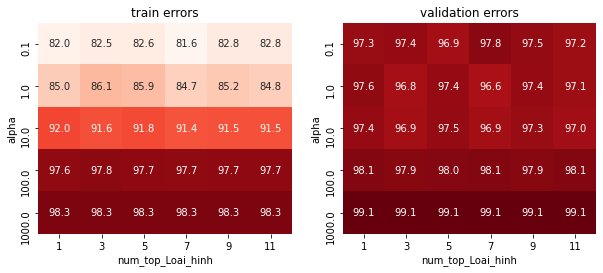

In [34]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas, columns=num_top_Loai_hinh_s)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas, columns=num_top_Loai_hinh_s)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('num_top_Loai_hinh'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('num_top_Loai_hinh'); plt.ylabel('alpha');